# PS1

## 1. Flowchart

Write a function Print_values with arguments a, b, and c to reflect the following flowchart. Here the purple parallelogram operator on a list `[x, y, z]` is to compute and print `x+y-10z`. Try your output with some random `a`, `b`, and `c` values. Report your output when `a = 10, b = 5, c = 1`.

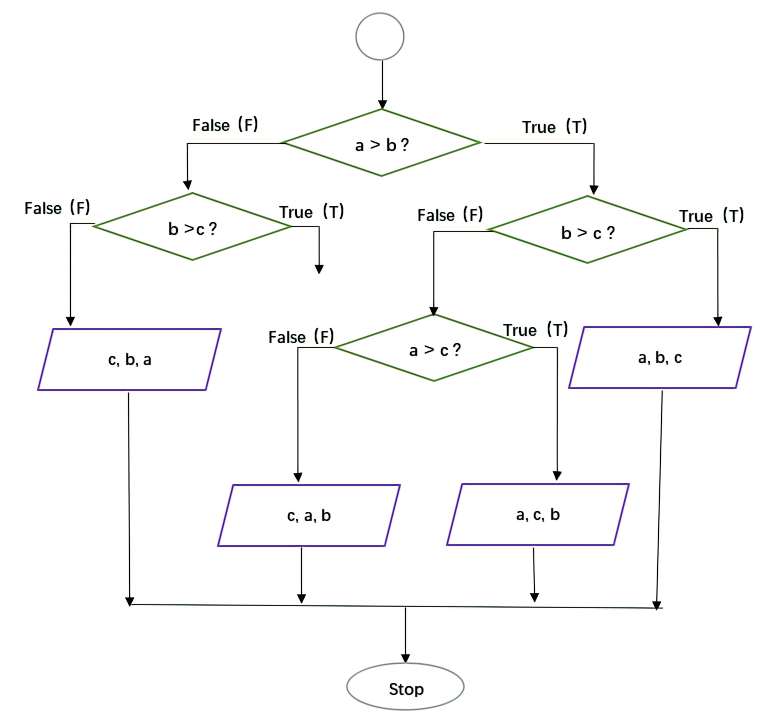


**Solution:**

In [3]:
def Print_values(a, b, c):
    if a > b:
        if b > c:
            lst = [a, b, c]
        else:
            if a > c:
                lst = [a, c, b]
            else:
                lst = [c, a, b]
    else:
        if b > c:
            if a > c:
                lst = [a, c, b]
            else:
                lst = [c, a, b]
        else:
            lst = [c, b, a]
    output = lst[0]+lst[1]-10*lst[2]
    print(output)

In [7]:
import random

a = round(random.random()*100)
b = round(random.random()*100)
c = round(random.random()*100)
print(a,b,c)

Print_values(a, b, c)

96 82 78
-602


In [8]:
a = 10
b = 5
c = 1

Print_values(a, b, c)

5


## 2. Continuous ceiling function
Given a list with `N` positive integers. For every element `x` of the list, find the value of continuous ceiling function defined as $F(x) = F(\text{ceil}(x/3)) + 2x$, where $F(1) = 1$.

**Solution:**

In [37]:
import math
import random

# Generate a list with N random positive integers
N = 5
inputs = [round(random.random()*100) for x in range(N)]
inputs

[93, 45, 90, 23, 75]

In [38]:
# Define a function to find the ceiling of x/3
def find_ceil(x):
    ceil = math.ceil(x/3)
    return ceil

In [39]:
# The main F(x) function using a while loop
# continually calling the find_ceil function to reduce x to integer 1 
def F(x):
    
    F_1 = 1
    add_all=0

    while x/3 > 1/3:
        add_all = add_all+2*x
        x = find_ceil(x)
        find_ceil(x)
        
    output = F_1+add_all
    return output

In [40]:
# Find and print all the outputs in a list
outputs = []

for x in inputs:
    outputs.append(F(x))
    
print(outputs)

[283, 135, 273, 69, 225]


## 3. Dice rolling

### 3.1
Given 10 dice each with 6 faces, numbered from 1 to 6. Write a function `Find_number_of_ways` to find the number of ways to get sum `x`, defined as the sum of values on each face when all the dice are thrown.

#### a. An 'impossible' approach

The first idea that comes into mind is to write a code to simulate die-rolling and repeat it as many times so as to obtain all possible ways to the target sum. This is a simple one to realise but performs horrible when you calculate more dice. In this case, 10-die-rolling is nearly impossible to solve, consuming huge amount of time.

But the good point of this approach is, it gives detailed list of all possible ways(discarding repeated ones) and runs well when you have a relatively small number of dice(like 3,4 dice or so).

Need to be mentioned, answer given by this approach can be either **'ordered'** or **'unordered'**. 'Ordered' means all the dice are thrown in a certain order, e.g. it can be count as two different way when you get a '1' with the 2nd die or a '1' with the 4th die, while other dice (and the sum itself) remain the same. 'Unordered' means you throw all the dice at once neglecting whether a number is given by a certain die. Since this approach stores all ways in a list, all difference between the two types is a `sort()` function(You'll see a comment about this in the code).

**Solution:**

In [16]:
# We firstly define a function to simulate throwing one die, outputing an integer from 1 to 6(inclusive).
import random

def roll_a_die():
    import math
    num = math.ceil(random.random()*6)
    return num

In [23]:
def An_impossible_approach(set_x):
    samples = [] #Create a list to store all possible ways
    for i in range(100000): #loop for as many times
        dice = [roll_a_die() for dice in range(4)] #4 die rolled in this case
        sum_x = 0 #initialise the sum value
        for die in dice:
            sum_x += die
        if sum_x == set_x: 
            #dice.sort()
            #the line above is optional,
            #without it, the solution will be 'ordered'
            if dice not in samples: #discard repeated ways
                samples.append(dice)
    return samples

x = 6 #target sum x    
print('All possible conbinations: \n',An_impossible_approach(x))
print('\nNumbers of possible ways: ',len(An_impossible_approach(x)))

All possible conbinations: 
 [[1, 2, 1, 2], [2, 1, 2, 1], [1, 1, 3, 1], [1, 2, 2, 1], [1, 1, 2, 2], [2, 2, 1, 1], [2, 1, 1, 2], [1, 1, 1, 3], [1, 3, 1, 1], [3, 1, 1, 1]]

Numbers of possible ways:  10


#### b. A feasible approach

The following approach uses an idea of dynamic programming. I was inspired by [some blogs](https://www.geeksforgeeks.org/dice-throw-dp-30/) introducing such a programming scheme. Also, I found there is a similar problem on Leetcode with more requriements, which takes more dice with more faces into account while limiting running time of the code.

Inspired by those blogs, I figured on my own the basic equation between the final sum and former throws,

$$dp[n][j]=\sum^f_{k=1}{dp[n-1][j-k]}$$

where $n$ is number of dice(die) thrown, $j$ is the target sum value, $f$ is the total faces on each die, and $k$ is a incrementing index that ends at f.

For exmaple, to find the number of ways that gives the sum 6 of 4 dice, we can turn to ways that gives the sum 5 of 3 dice plus one more throw that gives a '1'. This contains the idea of recursion - you need to find your answer in previous try, that is to break down your final sum value into previous tries until you have only 1 die that can definitely gives you numbers from 1 to 6(which is a certain '1' try).

Besides the basic equation, there must be some boundary conditions to limit the answer into reasonalbe number of ways, discarding those repeated solutions and those that surely will not happen. I tried several times and compared code of others to confirm that my code functions correctly when given any reasonalbe input values.

**Solution:**

In [12]:
# Define a function with two arguements,
# n is number of dice thrown
# j is the target sum value

def Find_number_of_ways(n,j):
    #the sum value should never exceed the total dots(n*6<j)
    #and the recursion should also end when the number of dice
    #is greater than the sum value(n>j) (cuz there's no 0 dot)
    if n*6 < j or n > j:
        return 0
    if n == 1: #with one die, there's only one way
        return 1
    memo = 0 #initialise our memory to store sum values
    for i in range(1,7):
        memo += dice_roll(n-1,j-i) #this part is the equation
    return memo

In [13]:
# Test the funciton with 10 dice rolling a sum of 20
Find_number_of_ways(10,20)

85228

This approach runs way more faster and is more acurate to realise the calculation. But problems still exist.

- The code runs smoothly when there're only 10 dice which meets the assignment requirement. But the similar problem on Leetcode gives up to 30 dice with 30 faces. The run-time of this code exceeds the time limit unfortunately. Maybe it's because the `for` loop, but I'm not sure yet. I'll look into it afterwards.
- Due to the algorithm it uses, the approach can only gives 'ordered' solutions. It means all the dice must have an order. I still don't know how to generate 'unordered' solutions like you throw the 10 dice all at once. It might be impossible, if not turn to other algorithms.

### 3.2
Count the number of ways for any `x` from 10 to 60, assign the number of ways to a list called `Number_of_ways`, so which `x` yields the maximum of `Number_of_ways`?

**Solution:**

In [32]:
Number_of_ways = []

for x in range(10,61):
    Number_of_ways.append(Find_number_of_ways(10,x))

print(Number_of_ways)

[1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]


In [36]:
max_ways = np.array(Number_of_ways).max()
max_value = np.argmax(Number_of_ways)+10
print(max_ways, max_value)

4395456 35


## 4. Dynamic programming

### 4.1
Write a function `Random_integer` to fill an array of `N` elements by randomly selecting integers from 0 to 10.

**Solution:**

In [38]:
def Random_integer(N):
    
    import random
    
    arr = [round(random.random()*10) for x in range(N)]
    
    return arr

### 4.2
Write a function Sum_averages to compute the sum of the average of all subsets of the array. For example, given an array of `[1, 2, 3]`, you `Sum_averages` function should compute the sum of: average of `[1]`, average of `[2]`, average of `[3]`, average of `[1, 2]`, average of `[1, 3]`, average of `[2, 3]`, and average of `[1, 2, 3]`.

### 4.3
Call `Sum_averages` with `N` increasing from 1 to 100, assign the output to a list called `Total_sum_averages`. Plot `Total_sum_averages`, describe what do you see.

## 5. Path counting

### 5.1
Create a matrix with `N` rows and `M` columns, fill the right-bottom corner and top-left corner cells with 1, and randomly fill the rest of matrix with integer 0 or 1.

### 5.2
Consider a cell marked with 0 as a blockage or dead-end, and a cell marked with 1 is good to go. Write a function `Count_path` to count total number of paths to reach the right-bottom corner cell from the top-left corner cell.

**Notice:** for a given cell, you are only allowed to move either rightward or downward.

### 5.3
Let `N = 10`, `M = 8`, run `Count_path` for 1000 times, each time the matrix (except the right-bottom corner and top-left corner cells, which remain being 1) is re-filled with integer 0 or 1 randomly, report the mean of total number of paths from the 1000 runs.